In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


# fetch data 

In [5]:
df = pd.read_csv(r"C:\Users\ATOnile\Downloads\Dataset salary 2024.csv")

In [7]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
16529,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
16530,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
16531,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
16532,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


# show first 3 rows only 

In [7]:
df.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M


# show last 3 rows

In [9]:
df.tail(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
16531,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
16532,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
16533,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


# handel missing data 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16534 non-null  object
 8   remote_ratio        16534 non-null  int64 
 9   company_location    16534 non-null  object
 10  company_size        16534 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [13]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

# visiuilization 

# Average Salary by Job Title:

In [68]:
Average_Salary_by_Job_Title = df.groupby('job_title')['salary'].mean().reset_index()
Average_Salary_by_Job_Title.columns = ['job_title', 'salary']
print(Average_Salary_by_Job_Title)

                           job_title         salary
0                       AI Architect  252001.724138
1                       AI Developer  134684.210526
2                        AI Engineer  163626.866667
3                 AI Product Manager  141766.666667
4                      AI Programmer  764400.857143
..                               ...            ...
150               Sales Data Analyst   60000.000000
151           Software Data Engineer  120000.000000
152               Staff Data Analyst   84999.333333
153             Staff Data Scientist  134500.000000
154  Staff Machine Learning Engineer  185000.000000

[155 rows x 2 columns]


In [36]:
Average_Salary_by_Job_Title.head(7)

,job title,salary
0,AI Architect,252001.724138
1,AI Developer,134684.210526
2,AI Engineer,163626.866667
3,AI Product Manager,141766.666667
4,AI Programmer,764400.857143
5,AI Research Engineer,360871.428571
6,AI Research Scientist,104833.333333


In [76]:
top_5_job_titles = Average_Salary_by_Job_Title.sort_values(by='salary', ascending=False).head(5)
print(top_5_job_titles)

                          job_title        salary
138        Principal Data Architect  3.000000e+06
115  Lead Machine Learning Engineer  1.566200e+06
130         Manager Data Management  1.562500e+06
110        Head of Machine Learning  1.146000e+06
112               Lead Data Analyst  1.095833e+06


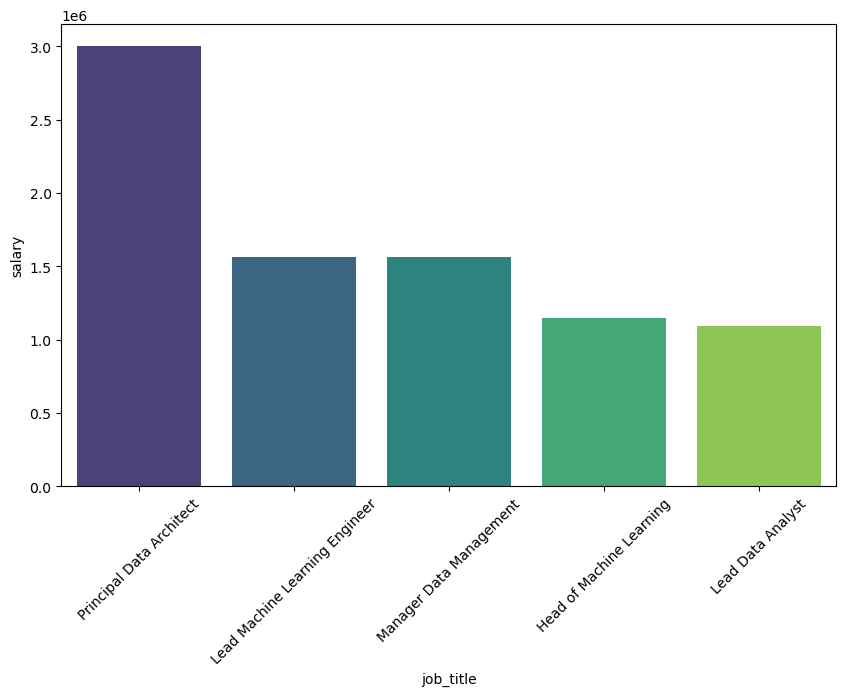

In [80]:
# Plotting the average salary by job title
plt.figure(figsize=(10, 6))
sns.barplot(x='job_title', y='salary', data=top_5_job_titles, palette='viridis')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

# Salary Distribution by Experience Level:

In [84]:
df['experience_level'].value_counts()

experience_level
SE    10670
MI     4038
EN     1325
EX      501
Name: count, dtype: int64

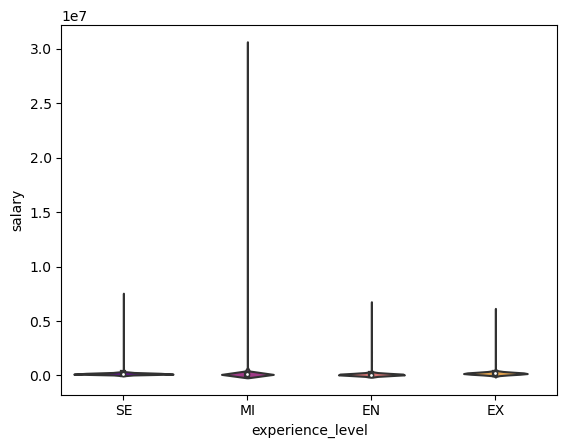

In [88]:
sns.violinplot(x = 'experience_level', y = 'salary', data = df, palette='plasma')
plt.show()

# Average Salary by Employment Type:

In [94]:
Average_Salary_by_Employment_Type = df.groupby('employment_type')['salary'].mean().reset_index()
Average_Salary_by_Employment_Type.columns = ['employment_type', 'salary']
print(Average_Salary_by_Employment_Type)

  employment_type         salary
0              CT  115664.142857
1              FL  430182.500000
2              FT  163707.561930
3              PT  109374.368421


In [96]:
df['employment_type'].value_counts()

employment_type
FT    16454
PT       38
CT       28
FL       14
Name: count, dtype: int64

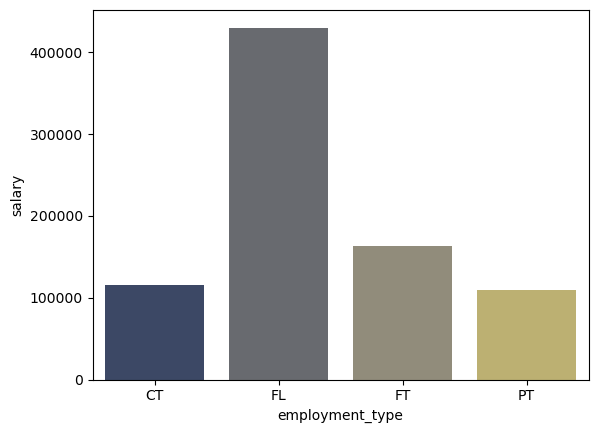

In [104]:
sns.barplot(x = "employment_type", y = "salary", data = Average_Salary_by_Employment_Type, palette= 'cividis' )
plt.show()

# Salary Comparison by Company Size

In [106]:
df['company_size'].value_counts()

company_size
M    15306
L     1040
S      188
Name: count, dtype: int64

In [110]:
Salary_Comparison_by_Company_Size = df.groupby('company_size')['salary'].mean().reset_index()
Salary_Comparison_by_Company_Size.columns = ['company_size','salary']
print(Salary_Comparison_by_Company_Size)

  company_size         salary
0            L  308403.983654
1            M  152413.901150
2            S  284437.696809


In [128]:
 y = Salary_Comparison_by_Company_Size.value_counts().index
 x = Salary_Comparison_by_Company_Size.value_counts().values
print(x)
print(y)

[1 1 1]
MultiIndex([('L', 308403.98365384614),
            ('M', 152413.90114987586),
            ('S', 284437.69680851063)],
           names=['company_size', 'salary'])


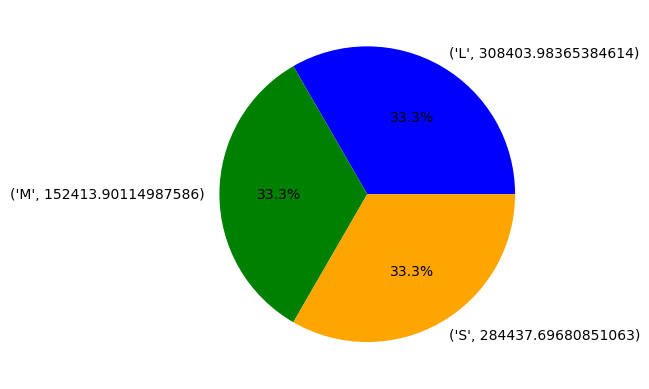

In [148]:
custom_colors = ['blue', 'green', 'orange', 'red'] 
plt.pie(x,labels = y, autopct = "%0.1f%%", colors= custom_colors)
plt.show()

# Top-Paying Job Titles:

In [9]:
df['job_title'].value_counts()

job_title
Data Engineer                    3464
Data Scientist                   3314
Data Analyst                     2440
Machine Learning Engineer        1705
Research Scientist                531
                                 ... 
Quantitative Research Analyst       1
AWS Data Architect                  1
Analytics Engineering Manager       1
Marketing Data Scientist            1
Applied Research Scientist          1
Name: count, Length: 155, dtype: int64

In [51]:
Top_Paying_Job_Titles = df.groupby('job_title')['salary'].mean().reset_index()
Top_Paying_Job_Titles.columns = ['job_title', 'salary' ]
print(Top_Paying_Job_Titles)

                           job_title         salary
0                       AI Architect  252001.724138
1                       AI Developer  134684.210526
2                        AI Engineer  163626.866667
3                 AI Product Manager  141766.666667
4                      AI Programmer  764400.857143
..                               ...            ...
150               Sales Data Analyst   60000.000000
151           Software Data Engineer  120000.000000
152               Staff Data Analyst   84999.333333
153             Staff Data Scientist  134500.000000
154  Staff Machine Learning Engineer  185000.000000

[155 rows x 2 columns]


In [62]:
Top_Paying_Job_Titles.head(7)

,job_title,salary
0,AI Architect,252001.724138
1,AI Developer,134684.210526
2,AI Engineer,163626.866667
3,AI Product Manager,141766.666667
4,AI Programmer,764400.857143
5,AI Research Engineer,360871.428571
6,AI Research Scientist,104833.333333


In [72]:
Top_Paying_Job_Titles_5 = Top_Paying_Job_Titles.sort_values( by='salary', ascending=False).head(5)
print(Top_Paying_Job_Titles_5)

                          job_title        salary
138        Principal Data Architect  3.000000e+06
115  Lead Machine Learning Engineer  1.566200e+06
130         Manager Data Management  1.562500e+06
110        Head of Machine Learning  1.146000e+06
112               Lead Data Analyst  1.095833e+06


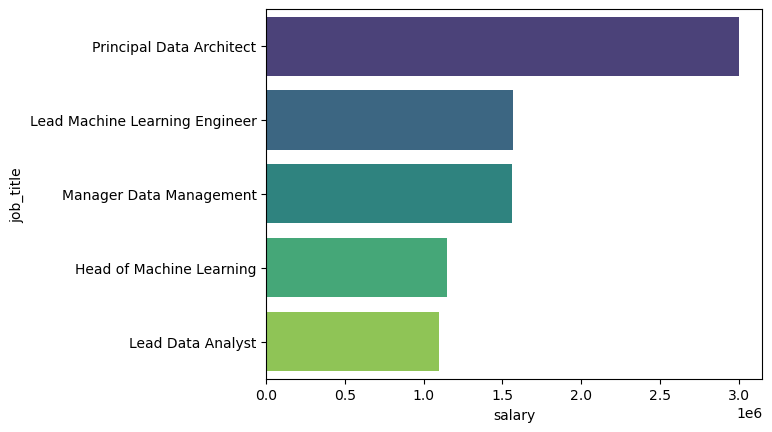

In [74]:
sns.barplot(x='salary', y='job_title', data=Top_Paying_Job_Titles_5, palette='viridis')
plt.show()

# Salary Trends Over Time:

In [76]:
df['work_year'].value_counts()

work_year
2023    8519
2024    6067
2022    1655
2021     218
2020      75
Name: count, dtype: int64

In [84]:
Salary_Trends_Over_Time = df.groupby('work_year')['salary'].mean().reset_index()
Salary_Trends_Over_Time.columns = ['work_year', 'salary']
print(Salary_Trends_Over_Time )

   work_year         salary
0       2020  356637.453333
1       2021  559350.990826
2       2022  167705.961934
3       2023  159319.800916
4       2024  152229.524477


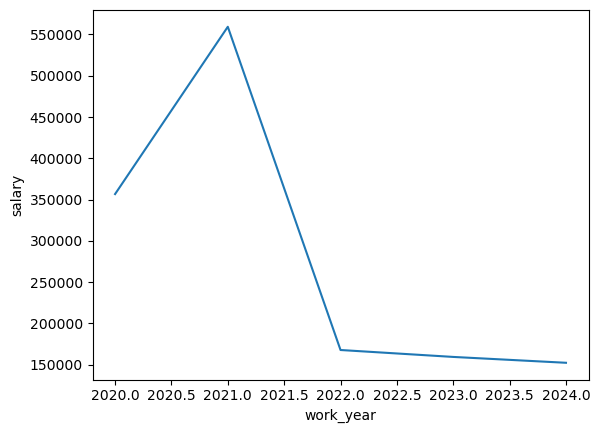

In [86]:
sns.lineplot(x = 'work_year', y = 'salary' , data = Salary_Trends_Over_Time)
plt.show()

# Remote Work Impact on Salary

In [88]:
df['remote_ratio'].value_counts()

remote_ratio
0      11118
100     5167
50       249
Name: count, dtype: int64

In [94]:
Remote_Work_Impact_on_Salary = df.groupby('remote_ratio')['salary'].mean().reset_index()
Remote_Work_Impact_on_Salary.columns = ['remote_ratio', 'salary']
print(Remote_Work_Impact_on_Salary)

   remote_ratio         salary
0             0  154675.456557
1            50  532770.393574
2           100  165419.014322


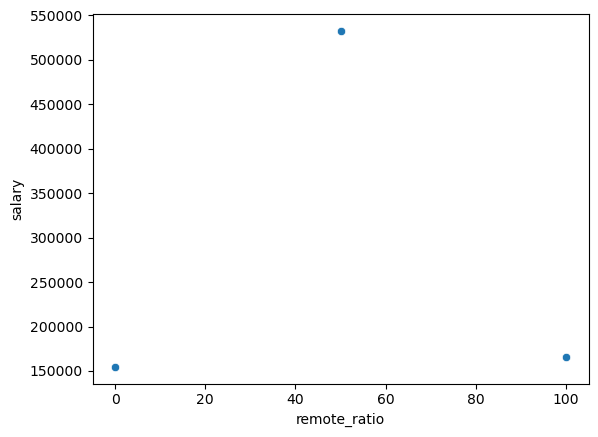

In [102]:
sns.scatterplot( x = 'remote_ratio', y = 'salary', data = Remote_Work_Impact_on_Salary)
plt.show()

# Salary by Location:

In [106]:
df['company_location'].value_counts().head(4)

company_location
US    14518
GB      694
CA      455
ES      133
Name: count, dtype: int64

In [108]:
Salary_by_Location = df.groupby('company_location')['salary'].mean().reset_index()
print(Salary_by_Location)

   company_location         salary
0                AD   47000.000000
1                AE   86000.000000
2                AM   50000.000000
3                AR   62444.444444
4                AS  470666.666667
..              ...            ...
72               TR  143666.666667
73               UA  105600.000000
74               US  158078.590439
75               VN   63000.000000
76               ZA   76508.157895

[77 rows x 2 columns]


In [112]:
Salary_by_Location_5 = Salary_by_Location.sort_values( by='salary', ascending=False).head(5)
print(Top_Paying_Job_Titles_5)

                          job_title        salary
138        Principal Data Architect  3.000000e+06
115  Lead Machine Learning Engineer  1.566200e+06
130         Manager Data Management  1.562500e+06
110        Head of Machine Learning  1.146000e+06
112               Lead Data Analyst  1.095833e+06


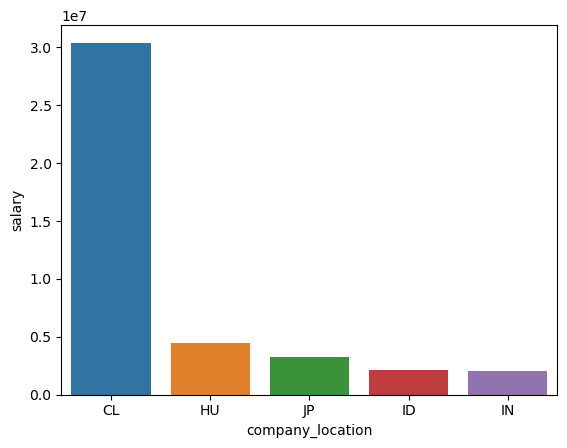

In [114]:
sns.barplot(x = 'company_location', y = 'salary',data =Salary_by_Location_5 )
plt.show()